# 자연어 처리(Natural Language Processing, NLP)

- 한국어, 영어 등 우리가 평소에 쓰는 언어

- 사람의 말을 컴퓨터가 이해하도록 수행하는 과정

## 신경망에서의 단어 처리 (단어 임베딩, Word Embedding)
- 단어를 있는 그대로 처리하지 않고 고정 길이의 벡터로 표현 (원-핫 인코딩)

- 단어 하나에 인덱스 정수를 할당하는 Bag of Words 방법

- 예시)  
  "you", "are", "not", "a", "smart", "student"

  - "you"     : 0
  - "are"     : 1
  - "not"     : 2
  - "a"       : 3
  - "smart"   : 4
  - "student" : 5

        "You are a smart student."  
    ---> [1, 1, 0, 1, 1, 1]

  <br>
  
  <img src="https://miro.medium.com/max/1348/1*YEJf9BQQh0ma1ECs6x_7yQ.png" width="600">

  <sub>출처: https://medium.com/@athif.shaffy/one-hot-encoding-of-text-b69124bef0a7</sub>

## 신경망에서의 단어처리 구조

<img src="https://miro.medium.com/max/1000/1*1O5gLhOg25HviI8bwZxV4g.png" width="600">

<sub>출처: https://mc.ai/deep-nlp-word-vectors-with-word2vec/</sub>

## CBOW (Continuous Bag of Words) Embedding
- 복수 단어 문맥(multi-word context)에 대한 문제  
  즉, 여러개의 단어를 나열한 뒤 이와 관련된 단어를 추정하는 문제

- 예를 들어,  
      Betty bought a bit of better butter.

  위 예시에서 (Betty, a bit, butter)라는 문맥이 주어지면 bought를 예측하는 구조

  <br>

  <img src="https://miro.medium.com/max/604/1*DfuBd49nCtT99h328iXL2Q.png" width="300">

  <sub>출처: https://medium.com/@srishtee.kriti/mathematics-behind-continuous-bag-of-words-cbow-model-1e54cc2ecd88</sub>

## Skip-Gram Embedding
- CBOW 방식과 반대

- 특정한 단어로부터 문맥이 될 수 있는 단어를 예측

- 보통 입력 단어 주변의  $k$ 개 단어를 문맥으로 보고 예측 모형을 만드는데 이  $k$ 값을 window size 라고 한다.

- 예시) window size = 2 라면,  
      Betty -> bought, butter  
      bought -> butter, Betty  
      a -> bit, of  

  <br>

  <img src="https://www.researchgate.net/publication/322905432/figure/fig1/AS:614314310373461@1523475353979/The-architecture-of-Skip-gram-model-20.png" width="300">

  <sub>출처: https://www.researchgate.net/figure/The-architecture-of-Skip-gram-model-20_fig1_322905432</sub>

## Word2Vec
- CBOW, Skip_Gram 방식의 단어 임베딩을 구현.  
  구글의 Mikolov 개발

- subsampling, negative sampling 등의 기법 추가하여 학습 속도 향상

  <img src="https://mbenhaddou.com/wp-content/uploads/2019/12/img_4.png">

  <sub>출처: http://mbenhaddou.com/2019/12/14/word2vec-concepts-from-scratch/</sub>

  <br>

  <img src="https://miro.medium.com/max/2456/1*gcC7b_v7OKWutYN1NAHyMQ.png" width="600">

  <sub>출처: https://towardsdatascience.com/word-embeddings-for-nlp-5b72991e01d4</sub>

## Word2Vec 예제

- 출처: https://datascienceschool.net/view-notebook/6927b0906f884a67b0da9310d3a581ee/

In [1]:
import nltk

nltk.download("movie_reviews")
nltk.download("punkt")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/nehcream/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nehcream/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.corpus import movie_reviews

sentences = [list(s) for s in movie_reviews.sents()]

In [3]:
sentences[0]


['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [4]:
from gensim.models.word2vec import Word2Vec


In [5]:
model = Word2Vec(sentences)


In [6]:
model.init_sims(replace=True)  # 모델의 초기화

/var/folders/24/h6r1lsxx1k1gcpbs79bpj3m80000gn/T/ipykernel_8326/994791617.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True) #모델의 초기화


In [7]:
model.wv.similarity("fruit", "apple")  # 과일과 사과 사이의 유사성 계산

0.8258508

In [8]:
model.wv.similarity("he", "she")

0.8239647

In [9]:
model.wv.similarity("fruit", "he")

0.17538545

In [10]:
model.wv.most_similar("student")  # 키워드와 가장 관련있는것들 봅아냄

[('teacher', 0.9076157808303833),
 ('priest', 0.9027391076087952),
 ('murderer', 0.8981541395187378),
 ('musician', 0.8964099884033203),
 ('scientist', 0.8939735889434814),
 ('teenager', 0.8933337926864624),
 ('prisoner', 0.8909226059913635),
 ('millionaire', 0.8848928213119507),
 ('security', 0.8836626410484314),
 ('investigator', 0.8827895522117615)]

In [11]:
model.wv.most_similar("movie")

[('film', 0.9380579590797424),
 ('picture', 0.8179912567138672),
 ('sequel', 0.7646840810775757),
 ('case', 0.7061218023300171),
 ('story', 0.6725152730941772),
 ('flick', 0.6698704957962036),
 ('ending', 0.6597436666488647),
 ('premise', 0.6585481762886047),
 ('thing', 0.647964596748352),
 ('plot', 0.6404392719268799)]

In [12]:
model.wv.most_similar(positive=["she", "king"], negative="queen", topn=10)

[('he', 0.7097917199134827),
 ('everyone', 0.5497013330459595),
 ('it', 0.5260722637176514),
 ('death', 0.49307528138160706),
 ('role', 0.4747210443019867),
 ('performance', 0.4735472798347473),
 ('ending', 0.46885597705841064),
 ('hell', 0.4668894410133362),
 ('everything', 0.4618965983390808),
 ('nobody', 0.45718273520469666)]

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)


In [15]:
review_vocab = list(model.wv.key_to_index.keys())
review_vectors = [model.wv.get_vector(word) for word in review_vocab]
review_similarity = review_vectors
review_similarity


[array([-0.0025293 , -0.00608928,  0.11081174,  0.00761788, -0.05447501,
         0.02497376, -0.04591742,  0.03681393, -0.2180707 , -0.1605448 ,
         0.00319212, -0.12721041, -0.05568935,  0.08993485,  0.10943014,
        -0.05622274,  0.078696  , -0.11722208,  0.0802293 , -0.06430744,
         0.07756709,  0.0035047 , -0.0564692 ,  0.01317514,  0.05501376,
        -0.07689683,  0.09028642,  0.11364372, -0.03809481, -0.08396492,
        -0.07595506, -0.03559164, -0.04989966, -0.1347716 , -0.01734299,
        -0.17456068, -0.11443456, -0.18134789,  0.03485245, -0.10554597,
        -0.1955961 ,  0.05201146, -0.26041052,  0.07415684,  0.13521019,
         0.02789263,  0.02572247,  0.01415162,  0.10185733,  0.03346972,
         0.03915038, -0.02098612, -0.02412206, -0.06208992, -0.06828207,
        -0.05376079, -0.06041768, -0.01397837, -0.05707079,  0.2836968 ,
        -0.10007522,  0.16716969, -0.1105255 , -0.13404384,  0.10412956,
        -0.04421778,  0.18507512,  0.234277  , -0.2

In [19]:
import numpy as np

np.array(review_similarity).shape

(14794, 100)

In [22]:
import pandas as pd

similarity = tsne.fit_transform(np.array(review_similarity))
review_df = pd.DataFrame(similarity, columns=["x", "y"], index=review_vocab)
review_1000 = review_df[0:1000]

/var/folders/24/h6r1lsxx1k1gcpbs79bpj3m80000gn/T/ipykernel_8326/3850152898.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


(-84.62008819580078, 83.76641998291015, -57.82693576812744, 66.31861591339111)

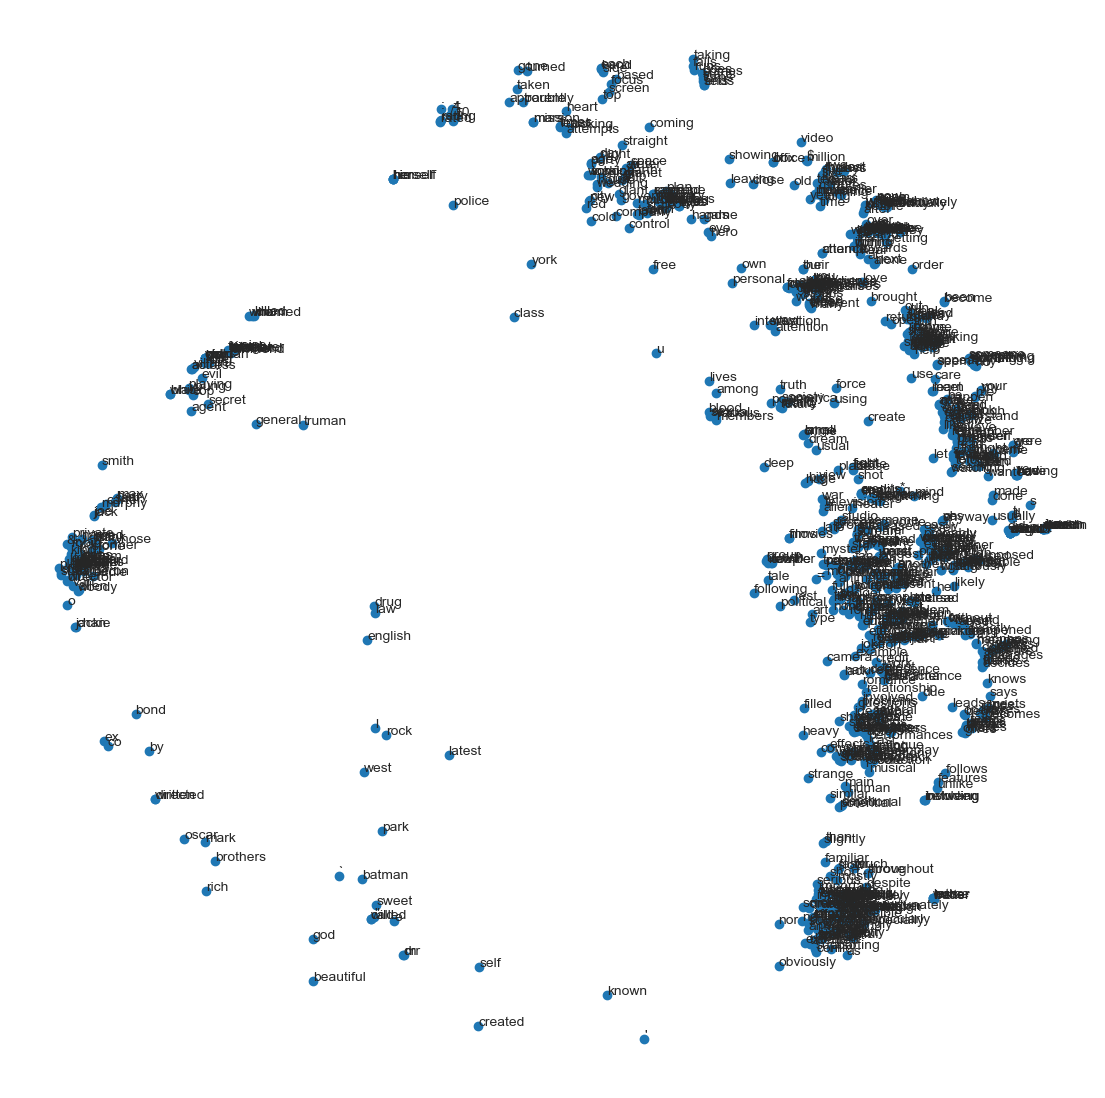

In [23]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-white")

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(review_1000["x"], review_1000["y"])
for word, pos in review_1000.iterrows():
    ax.annotate(word, pos)
ax.axis("off")

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## BPTT(BackPropagation Through Time)

- 시간 방향으로 펼친 신경망의 오차역전파

- 시계열 데이터의 시간 크기가 커지면 역전파 시 불안정해짐

- 기울기 소실 문제 발생

  <img src="https://iamtrask.github.io/img/backprop_through_time.gif" width="700">

  <sub>출처: https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/</sub>

## Truncated BPTT

- 큰 시계열 데이터를 다룰 때 사용하는 오차역전파법

- 신경망을 **적당한 길이로 끊는다.**
  - <u>역전파에 연결만! 순전파의 연결은 끊어지지 않는다.</u>

- 학습 시, 입력이 **순서대로 연결**되어 입력해야 함

  <img src="https://r2rt.com/static/images/RNN_true_truncated_backprop.png">

  <sub>출처: https://r2rt.com/styles-of-truncated-backpropagation.html</sub>


## RNN 구현

- 형상 주의!

## $\qquad \ h_{t-1} W_h \ + \ x_t W_x = h_t$

- $h_{t-1}$ : $N \times H$

- $W_{h}$ : $H \times H$

- $x_{t}$ : $N \times D$

- $W_{x}$ : $D \times H$

- $h_t$ : $N \times H$

- $D$ : 입력 벡터의 차원 수

- $H$ : 은닉 상태 벡터의 차원 수


In [24]:
import numpy as np


class RNN:
    def __init__(self, W_x, W_h, bias):
        self.params = [W_x, W_h, bias]
        self.grads = [np.zeros_like(W_x), np.zeros_like(W_h), np.zeros_like(b)]

        self.temp = None

    def forward(self, input_data, h_prev):
        W_x, W_h, bias = self.params
        t = np.matmul(h_prev, W_h) + np.matmul(input_data, W_x) + bias
        h_next = np.tanh(t)

        self.temp = (input_data, h_prev, h_next)
        return h_next

    def backward(self, dh_next):
        W_x, W_h, bias = self.params
        input_data, h_prev, h_next = self.temp

        dt = dh_next * (1 - h_next**2)
        db = np.sum(dt, axis=0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, W_h.T)
        dWx = np.matmul(input_data.T, dt)
        dx = np.matmul(dt, W_x.T)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        return dx, dh_prev

## Time RNN Layer
- RNN 계층의 은닉상태 $h$를 가지고 있음
 

In [25]:
class TimeRNN:
    def __init__(self, W_x, W_h, bias, stateful=False):
        self.params = [W_x, W_h, bias]
        self.grads = [np.zeros_like(W_x), np.zeros_like(W_h), np.zeros_like(bias)]
        self.layers = None
        self.hidden_state = None
        self.dh = None
        self.stateful = stateful

    def set_state(self, hidden_state):
        self.hidden_state = hidden_state

    def reset_state(self):
        self.hidden_state = None

    def forward(self, input_data):
        W_x, W_h, bias = self.params
        N, T, D = input_data.shape
        D, H = W_x.shape
        self.layers = []
        output = np.empty((N, T, H), dtype="f")

        if not self.stateful or self.hidden_state is None:
            self.hidden_state = np.zeros((N, H), dtype="f")

        for t in range(T):
            layer = RNN(*self.params)
            self.hidden_state = layer.forward(input_data[:, t, :], self.h)
            output[:, t, :] = self.hidden_state
            self.layers.append(layer)

        return output

    def backward(self, doutput):
        W_x, W_h, bias = self.params
        N, T, H = doutput.shape
        D, H = W_x.shape

        dinput = np.empty((N, T, D), dtype="f")
        dh = 0
        grads = [0, 0, 0]

        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(doutput[:, t, :] + dh)
            dinput[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad

        self.dh = dh

        return dinput

# LSTM (Long Shot-Term Memory)

- RNN은 장기 기억을 제대로 처리 못함

- RNN은 기울기 소실 또는 기울기 폭발을 발생

- 위를 해결하기 위해 LSTM 방법 등장

  <img src="https://www.researchgate.net/publication/324600237/figure/fig3/AS:616974623178753@1524109621725/Long-Short-term-Memory-Neural-Network.png" width="600">

<sub>출처: https://www.researchgate.net/figure/Long-Short-term-Memory-Neural-Network_fig3_324600237</sub>

### $\qquad f = \sigma (x_t W^{(f)}_x + h_{t-1} W^{(f)}_h + b^{(f)} \\ 
\qquad g = tanh(x_t W^{(g)}_x + h_{t-1} W^{(g)}_h + b^{(g)}) \\
\qquad i = \sigma(x_t W^{(i)}_x + h_{t-1} W^{(i)}_h + b^{(i)}) \\
\qquad o = tanh(x_t W^{(o)}_x + h_{t-1} W^{(o)}_h + b^{(o)})$


### $\qquad c_t = f \odot c_{t-1} + g \odot i \\
\qquad h_t = o \odot tanh(c_t)
$


## forget gate (망각 게이트)
- 불필요한 정보를 잊는 게이트

-  $h_{t−1}$ 과 $x_t$ 를 받아 시그모이드를 취해준 값이 forget gate의 출력값

- 시그모이드 함수를 통과하기 때문에 그 값이 0이라면 이전 상태의 정보는 잊고, 1이라면 이전 상태의 정보를 온전히 기억

  <img src="https://image.slidesharecdn.com/dlsl2017d2l2recurrentneuralnetworksi-170125171004/95/recurrent-neural-networks-i-d2l2-deep-learning-for-speech-and-language-upc-2017-25-638.jpg?cb=1485365064" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

## input gate (입력 게이트)
- 현재 정보를 기억하기’ 위한 게이트

- $h_{t−1}$ 과 $x_t$를 받아 $Sigmoid$ -> $tanh$ 를 통과한 다음,  
  Hadamard product 연산을 한 값을 출력
  
  <br>

  <img src="https://image.slidesharecdn.com/dlmmdcud2l08recurrentneuralnetworks-170429103823/95/recurrent-neural-networks-d2l8-insightdcu-machine-learning-workshop-2017-28-638.jpg?cb=1493462658" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

## output gate (출력 게이트)

- 은닉 상태 $h_t$의 출력을 담당하는 게이트

- 입력 $x_t$와 이전 상태 $h_{t-1}$로부터 게이트의 열림 상태가 결정됨

  <img src="https://image.slidesharecdn.com/dlcvd2l6recurrentneuralnetworks-160802094750/95/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016-30-638.jpg?cb=1470131837" width="600">

<sub>출처: https://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016</sub>

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


# (참고) RNN vs LSTM vs GRU

<img src="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_1849/http://dprogrammer.org/wp-content/uploads/2019/04/RNN-vs-LSTM-vs-GRU.png">

<sub>출처: http://dprogrammer.org/rnn-lstm-gru</sub>